In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

2022-05-13 07:17:21.568093: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


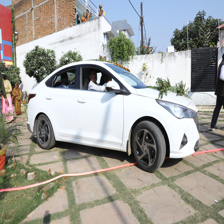

In [3]:
car = Image.open("../input/carjpg/IMG_8178.JPG").resize(IMAGE_SHAPE)
car

In [4]:
car_jpg= np.array(car)/255
car_jpg.shape

(224, 224, 3)

In [5]:
car_jpg[np.newaxis, ...]

array([[[[0.59215686, 0.72156863, 0.89019608],
         [0.59215686, 0.72156863, 0.89019608],
         [0.59607843, 0.7254902 , 0.89019608],
         ...,
         [0.62745098, 0.74509804, 0.89411765],
         [0.62745098, 0.74117647, 0.89411765],
         [0.62745098, 0.74117647, 0.89411765]],

        [[0.59607843, 0.72156863, 0.89019608],
         [0.59215686, 0.7254902 , 0.89019608],
         [0.59215686, 0.7254902 , 0.89411765],
         ...,
         [0.62745098, 0.74509804, 0.89411765],
         [0.62745098, 0.74117647, 0.89411765],
         [0.62745098, 0.74117647, 0.89411765]],

        [[0.59607843, 0.7254902 , 0.89411765],
         [0.59607843, 0.72156863, 0.89019608],
         [0.6       , 0.7254902 , 0.89411765],
         ...,
         [0.62745098, 0.74509804, 0.89411765],
         [0.62745098, 0.74509804, 0.89019608],
         [0.62745098, 0.74117647, 0.89019608]],

        ...,

        [[0.42745098, 0.4745098 , 0.32156863],
         [0.4       , 0.45490196, 0.29411765]

In [6]:
result = classifier.predict(car_jpg[np.newaxis, ...])
result.shape

2022-05-13 07:17:24.789046: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(1, 1001)

In [7]:
predicted_label_index = np.argmax(result)
predicted_label_index

480

In [8]:
labels=tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("/root/.keras/datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

24576/10484 [======================================================================] - 0s 0us/step


['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [9]:
image_labels[predicted_label_index]

'car wheel'

In [10]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [11]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [12]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/286875003_f7c0e1882d.jpg'),
 PosixPath('datasets/flower_photos/daisy/181007802_7cab5ee78e_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14167534527_781ceb1b7a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14350958832_29bdd3a254.jpg'),
 PosixPath('datasets/flower_photos/daisy/2473825306_62fd5f8785_n.jpg')]

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [14]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/1788484468_f73afa6c32_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1392579828_ab5a139052.jpg'),
 PosixPath('datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg'),
 PosixPath('datasets/flower_photos/roses/15965652160_de91389965_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8442304572_2fdc9c7547_n.jpg')]

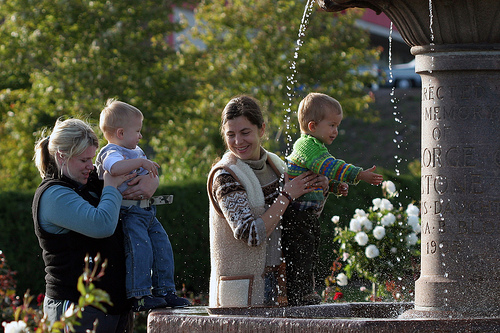

In [15]:
import PIL
PIL.Image.open(str(roses[1]))

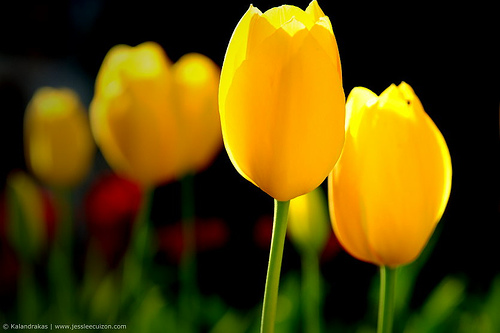

In [16]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [21]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

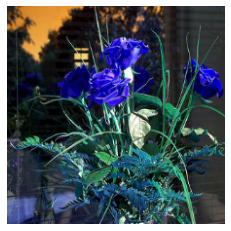

In [26]:
plt.axis('off')
plt.imshow(X[0])

In [27]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 550])

In [28]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [29]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 29s 287ms/step - loss: 0.9091 - acc: 0.6613
Epoch 2/5
86/86 [==============================] - 25s 292ms/step - loss: 0.4305 - acc: 0.8550
Epoch 3/5
86/86 [==============================] - 25s 294ms/step - loss: 0.3371 - acc: 0.8874
Epoch 4/5
86/86 [==============================] - 25s 289ms/step - loss: 0.2782 - acc: 0.9153
Epoch 5/5
86/86 [==============================] - 24s 283ms/step - loss: 0.2408 - acc: 0.9306


In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 318ms/step - loss: 0.3766 - acc: 0.8551


[0.37657633423805237, 0.8551198244094849]